In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

### Створимо тришарову нейромережу із розподілом слоїв 2-5-5-1  з сігмоїдною функціею.

### Сформуємо тренувальні віборки по  X та Y

In [2]:
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

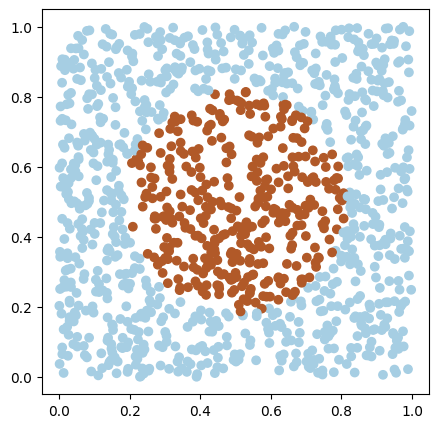

In [3]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [30]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2) 
        self.fc3 = nn.Linear(nH2, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x
        

In [31]:
model = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [32]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [33]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )  # режим оцінки моделі
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0627 accuracy: 0.0258
epoch:     0 loss: 0.0569 accuracy: 0.0575
epoch:   100 loss: 0.0516 accuracy: 0.0575
epoch:   200 loss: 0.0516 accuracy: 0.0575
epoch:   300 loss: 0.0515 accuracy: 0.0575
epoch:   400 loss: 0.0515 accuracy: 0.0575
epoch:   500 loss: 0.0515 accuracy: 0.0575
epoch:   600 loss: 0.0514 accuracy: 0.0575
epoch:   700 loss: 0.0514 accuracy: 0.0575
epoch:   800 loss: 0.0512 accuracy: 0.0575
epoch:   900 loss: 0.0510 accuracy: 0.0575
epoch:   999 loss: 0.0505 accuracy: 0.0575


In [34]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


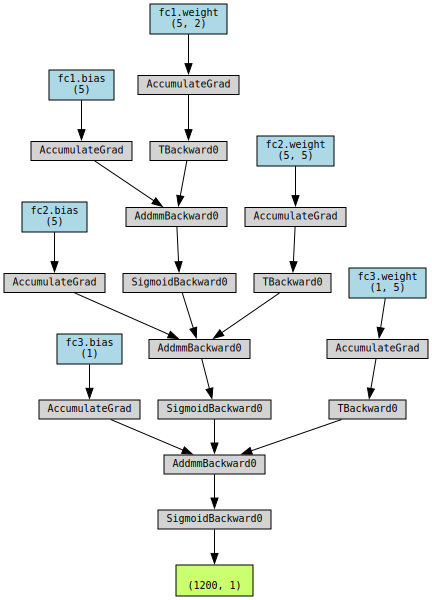

In [35]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

In [36]:
X1 = torch.rand (600, 2)                       
Y1 = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

In [37]:
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X1,Y1) )
epochs = 600                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X1, Y1)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.1029 accuracy: 0.1150
epoch:     0 loss: 0.1029 accuracy: 0.1150
epoch:   100 loss: 0.1026 accuracy: 0.1150
epoch:   200 loss: 0.1026 accuracy: 0.1150
epoch:   300 loss: 0.1026 accuracy: 0.1150
epoch:   400 loss: 0.1025 accuracy: 0.1150
epoch:   500 loss: 0.1025 accuracy: 0.1150
epoch:   599 loss: 0.1025 accuracy: 0.1150


### При  використанні тришарової нейронної мережі у порівнянні із двошаровою її навчання проходить гірше, точність моделі падає. Спробуємо збільшити кількість ітерацій (епох) для навчання

In [38]:
model = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0659 accuracy: 0.0258
epoch:     0 loss: 0.0585 accuracy: 0.0258
epoch:   100 loss: 0.0516 accuracy: 0.0575
epoch:   200 loss: 0.0516 accuracy: 0.0575
epoch:   300 loss: 0.0516 accuracy: 0.0575
epoch:   400 loss: 0.0516 accuracy: 0.0575
epoch:   500 loss: 0.0515 accuracy: 0.0575
epoch:   600 loss: 0.0515 accuracy: 0.0575
epoch:   700 loss: 0.0515 accuracy: 0.0575
epoch:   800 loss: 0.0514 accuracy: 0.0575
epoch:   900 loss: 0.0514 accuracy: 0.0575
epoch:  1000 loss: 0.0513 accuracy: 0.0575
epoch:  1100 loss: 0.0511 accuracy: 0.0575
epoch:  1200 loss: 0.0509 accuracy: 0.0575
epoch:  1300 loss: 0.0505 accuracy: 0.0575
epoch:  1400 loss: 0.0498 accuracy: 0.0575
epoch:  1500 loss: 0.0485 accuracy: 0.0575
epoch:  1600 loss: 0.0468 accuracy: 0.0575
epoch:  1700 loss: 0.0423 accuracy: 0.0575
epoch:  1800 loss: 0.0310 accuracy: 0.0675
epoch:  1900 loss: 0.0163 accuracy: 0.0808
epoch:  2000 loss: 0.0109 accuracy: 0.0800
epoch:  2100 loss: 0.0084 accuracy: 0.0800
epoch:  220

### При збільшеній кількості ітераці тришарова модель дає значно кращі показники loss функціі при тому що accuracy залишається практично не зміною.

In [39]:
X1 = torch.rand (600, 2)                       
Y1 = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X1,Y1) )
 
epochs = 5000                                           # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X1, Y1)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 1.3727 accuracy: 0.0917
epoch:     0 loss: 0.9029 accuracy: 0.0983
epoch:   100 loss: 0.0987 accuracy: 0.1150
epoch:   200 loss: 0.0952 accuracy: 0.1150
epoch:   300 loss: 0.0940 accuracy: 0.1150
epoch:   400 loss: 0.0933 accuracy: 0.1167
epoch:   500 loss: 0.0927 accuracy: 0.1167
epoch:   600 loss: 0.0921 accuracy: 0.1167
epoch:   700 loss: 0.0914 accuracy: 0.1167
epoch:   800 loss: 0.0891 accuracy: 0.1150
epoch:   900 loss: 0.0861 accuracy: 0.1183
epoch:  1000 loss: 0.0859 accuracy: 0.1200
epoch:  1100 loss: 0.0846 accuracy: 0.1150
epoch:  1200 loss: 0.0842 accuracy: 0.1150
epoch:  1300 loss: 0.0820 accuracy: 0.1233
epoch:  1400 loss: 0.0815 accuracy: 0.1250
epoch:  1500 loss: 0.0810 accuracy: 0.1233
epoch:  1600 loss: 0.0805 accuracy: 0.1233
epoch:  1700 loss: 0.0801 accuracy: 0.1200
epoch:  1800 loss: 0.0796 accuracy: 0.1217
epoch:  1900 loss: 0.0793 accuracy: 0.1217
epoch:  2000 loss: 0.0790 accuracy: 0.1217
epoch:  2100 loss: 0.0788 accuracy: 0.1217
epoch:  220

### При спробі довчити модель на додатковому масиві данних якість моделі не покращується, що може свідчити про перенавчаність моделі.
### Замінемо функції для визначення похибки на nn.MSELoss() та оптимізації на torch.optim.Adam

In [42]:
model = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
# loss = nn.BCELoss()
loss = nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
epochs = 5000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0262 accuracy: 0.0258
epoch:     0 loss: 0.0261 accuracy: 0.0258
epoch:   100 loss: 0.0219 accuracy: 0.0258
epoch:   200 loss: 0.0196 accuracy: 0.0575
epoch:   300 loss: 0.0185 accuracy: 0.0575
epoch:   400 loss: 0.0180 accuracy: 0.0575
epoch:   500 loss: 0.0179 accuracy: 0.0575
epoch:   600 loss: 0.0178 accuracy: 0.0575
epoch:   700 loss: 0.0178 accuracy: 0.0575
epoch:   800 loss: 0.0178 accuracy: 0.0575
epoch:   900 loss: 0.0178 accuracy: 0.0575
epoch:  1000 loss: 0.0178 accuracy: 0.0575
epoch:  1100 loss: 0.0178 accuracy: 0.0575
epoch:  1200 loss: 0.0178 accuracy: 0.0575
epoch:  1300 loss: 0.0178 accuracy: 0.0575
epoch:  1400 loss: 0.0178 accuracy: 0.0575
epoch:  1500 loss: 0.0178 accuracy: 0.0575
epoch:  1600 loss: 0.0178 accuracy: 0.0575
epoch:  1700 loss: 0.0178 accuracy: 0.0575
epoch:  1800 loss: 0.0178 accuracy: 0.0575
epoch:  1900 loss: 0.0178 accuracy: 0.0575
epoch:  2000 loss: 0.0178 accuracy: 0.0575
epoch:  2100 loss: 0.0178 accuracy: 0.0575
epoch:  220

### В даному випадку loss функція із застосуванням nn.MSELoss() показує гірші результати, але це використання різних методів оцінки, тому їх безпосередне порівняння є некоректним. Зміна функцій оптимізації покращила показник accuracy.